In [14]:
import os
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
!pip install beautifulsoup4


   ---------------------------------------- 0/2 [soupsieve]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   -------------------- ------------------- 1/2 [beautifulsoup4]
   ---------------------------------------- 2/2 [beautifulsoup4]



In [4]:
from bs4 import BeautifulSoup

In [5]:
resource_url = "https://tryscrapeme.com/web-scraping-practice/easy/abc"

In [6]:
response = requests.get(resource_url)

In [7]:
soup = BeautifulSoup(response.text, 'html')

In [10]:
table = soup.find("table")

In [11]:
headers = [th.text.strip() for th in table.find_all("th")]
print(headers)

['name', 'author', 'stars', 'price']


In [12]:
rows = []
for tr in table.find("tbody").find_all("tr"):
    cells = [td.text.strip() for td in tr.find_all("td")]
    rows.append(cells)

In [13]:
print(rows[:2])

[['Clean Code', 'Robert C. Martin', '4.5', '26.56'], ['The Legend of Zelda', 'Shigeru Miyamoto', '4.5', '27.56']]


In [15]:
main_df = pd.DataFrame(rows, columns=headers)

In [16]:
main_df.head(3)

,name,author,stars,price
0,Clean Code,Robert C. Martin,4.5,26.56
1,The Legend of Zelda,Shigeru Miyamoto,4.5,27.56
2,"Don't Make Me Think, Revisited",Steve Krug,4,23.03


In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   author  10 non-null     object
 2   stars   10 non-null     object
 3   price   10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [23]:
main_df['name'] = main_df['name'].astype(str)

In [26]:
print(main_df['name'].apply(type).value_counts())

name
<class 'str'>    10
Name: count, dtype: int64


In [27]:
main_df = main_df.convert_dtypes()


In [28]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     string
 1   author  10 non-null     string
 2   stars   10 non-null     string
 3   price   10 non-null     string
dtypes: string(4)
memory usage: 452.0 bytes


In [29]:
main_df["stars"] = main_df["stars"].astype(float)
main_df["price"] = main_df["price"].astype(float)

In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     string 
 1   author  10 non-null     string 
 2   stars   10 non-null     float64
 3   price   10 non-null     float64
dtypes: float64(2), string(2)
memory usage: 452.0 bytes


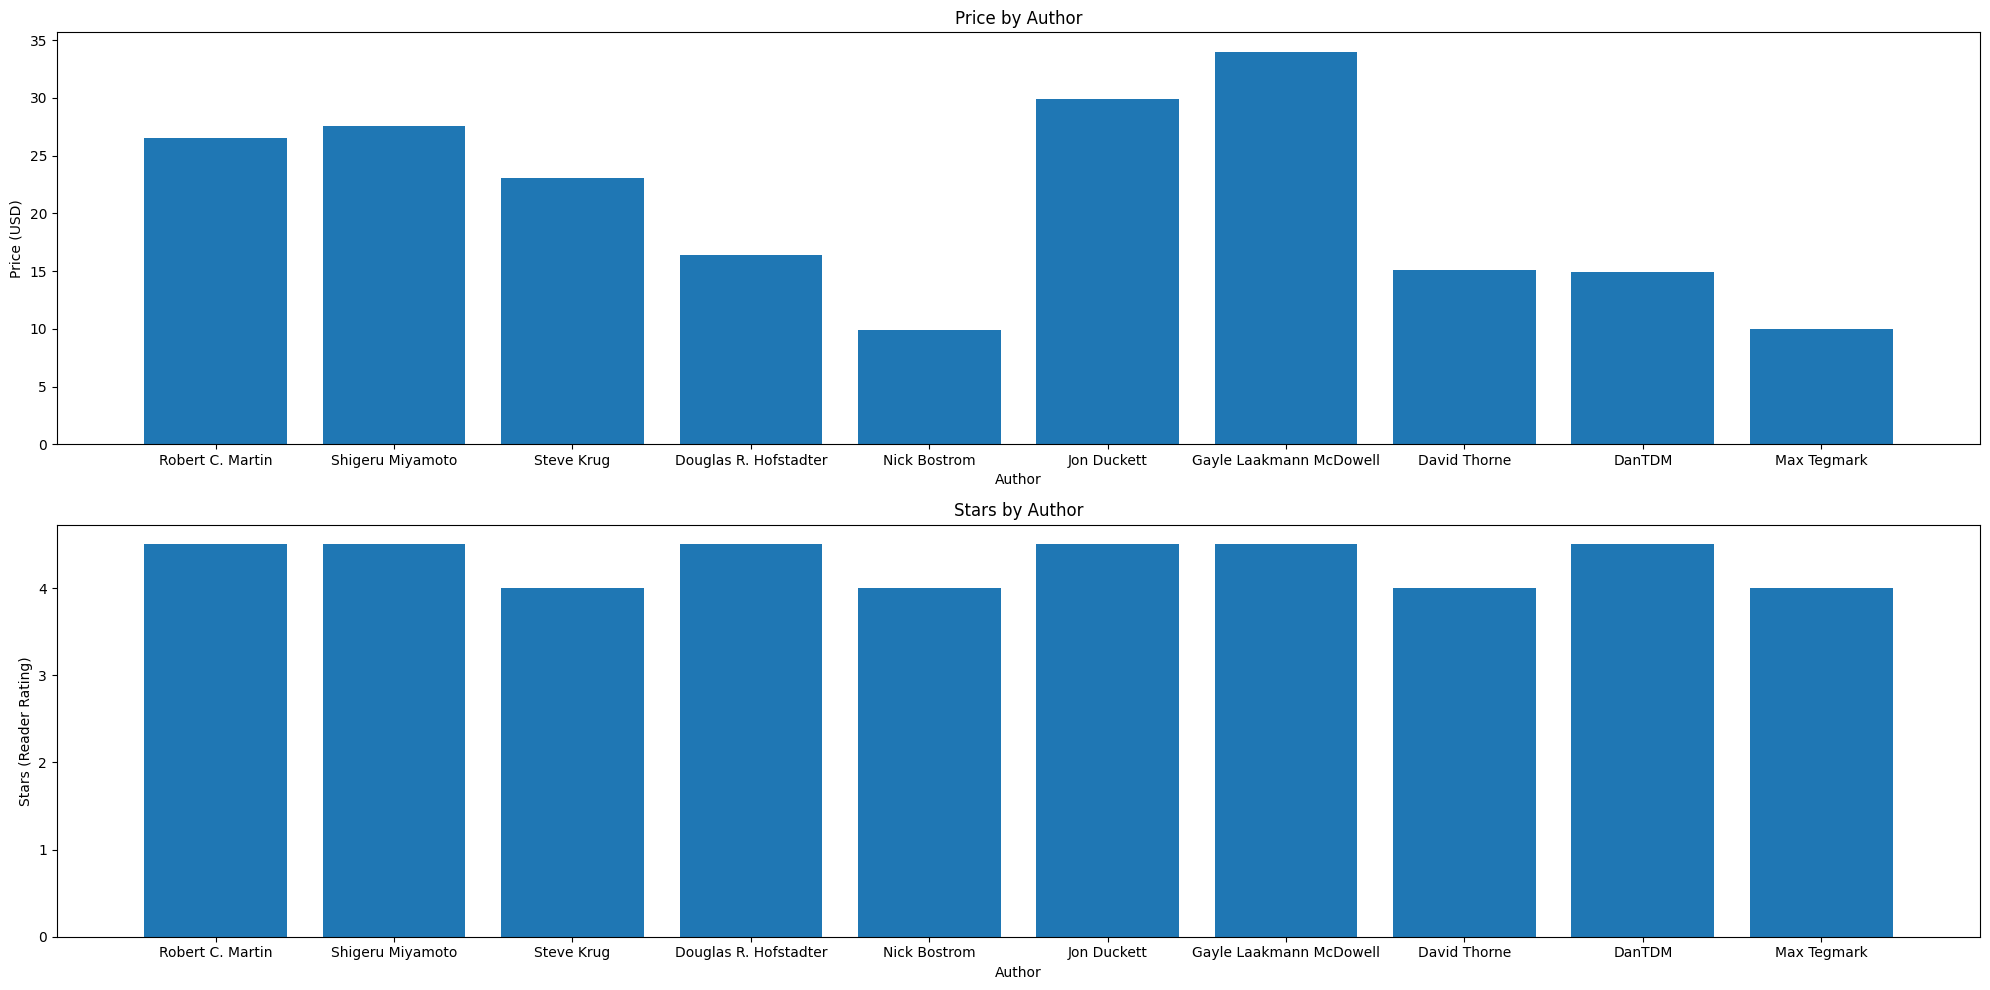

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(20,10))

axes[0].bar(main_df['author'], main_df['price'])
axes[0].set_title('Price by Author')
axes[0].set_xlabel('Author')
axes[0].set_ylabel('Price (USD)')

axes[1].bar(main_df['author'], main_df['stars'])
axes[1].set_title('Stars by Author')
axes[1].set_xlabel('Author')
axes[1].set_ylabel('Stars (Reader Rating)')

plt.tight_layout()
plt.show()


Add data to SQLite DB

In [54]:
con = sqlite3.connect("author_info.db")

In [ ]:
# .to_sql handles all executes, and commits internally
main_df.to_sql("author_info", con)


10

In [57]:
insert_into_DB_check = pd.read_sql("SELECT * FROM author_info", con)
print(insert_into_DB_check.head())


   index                            name                 author  stars  price
0      0                      Clean Code       Robert C. Martin    4.5  26.56
1      1             The Legend of Zelda       Shigeru Miyamoto    4.5  27.56
2      2  Don't Make Me Think, Revisited             Steve Krug    4.0  23.03
3      3             Godel, Escher, Bach  Douglas R. Hofstadter    4.5  16.37
4      4               Superintelligence           Nick Bostrom    4.0   9.93


In [58]:
con.close()